# KNN Algorithm

# Importing dependencies

In [402]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns


# What is the K-Nearest Neighbors Algorithm?
KNN is one of the most basic yet essential classification algorithms in machine learning. It belongs to the supervised learning domain and finds intense application in pattern recognition, data mining, and intrusion detection.

It is widely disposable in real-life scenarios since it is non-parametric, meaning it does not make any underlying assumptions about the distribution of data. We are given some prior data (also called training data), which classifies coordinates into groups identified by an attribute.

Given another set of data points (also called testing data), allocate these points to a group by analyzing the training set.

# Loading our data

In [403]:
# add the link of your dataset here: https://www.kaggle.com/datasets/ravikiran90/cervical-cancer-prediction
df = pd.read_csv('cancer_cervical.csv')

df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
2,34,1,?,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,...,?,?,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0,0,1,15,0,...,?,?,0,0,0,0,0,0,0,0


## Data Dictionary
From chatGPT:
- Age: The age of the individual.
- Number of sexual partners: The total number of sexual partners the individual has had.
- First sexual intercourse: The age at which the individual had their first sexual intercourse.
- Num of pregnancies: The number of times the individual has been pregnant.
- Smokes: Whether the individual smokes tobacco.
- Smokes (years): The number of years the individual has been smoking.
- Smokes (packs/year): The average number of packs of cigarettes smoked per year by the individual.
- Hormonal Contraceptives: Whether the individual uses hormonal birth control methods.
- Hormonal Contraceptives (years): The number of years the individual has used hormonal contraceptives.
- IUD: Intrauterine device - a form of long-term birth control.
- IUD (years): The number of years the individual has had an IUD.
- STDs: Sexually transmitted diseases - infections generally passed from person to person during sexual contact.
- STDs (number): The number of different sexually transmitted diseases the individual has been diagnosed with.
- STDs:condylomatosis: The presence of condyloma, which are warty growths typically associated with certain types of HPV (human papillomavirus).
- STDs:cervical condylomatosis: Condylomatosis specifically located on the cervix.
- STDs:vaginal condylomatosis: Condylomatosis specifically located in the vagina.
- STDs:vulvo-perineal condylomatosis: Condylomatosis located on the vulva or perineal area.
- STDs:syphilis: Whether the individual has been diagnosed with syphilis, which is a sexually transmitted infection caused by bacteria.
- STDs:pelvic inflammatory disease: Pelvic inflammatory disease (PID), an infection of the female reproductive organs often caused by STDs.
- STDs:genital herpes: Whether the individual has genital herpes, caused by the herpes simplex virus.
- STDs:molluscum contagiosum: A skin infection caused by Molluscum contagiosum virus, which can be sexually transmitted.
- STDs:AIDS: Acquired Immune Deficiency Syndrome, a chronic condition caused by the human immunodeficiency virus (HIV).
- STDs:HIV: Human Immunodeficiency Virus, the virus that can lead to AIDS.
- STDs:Hepatitis B: A liver infection caused by the Hepatitis B virus that can be sexually transmitted.
- STDs:HPV: Human Papillomavirus, a virus that can lead to warts and various cancers.
- STDs: Number of diagnosis: The number of times the individual has been diagnosed with any STD.
- STDs: Time since first diagnosis: The time elapsed since the individual was first diagnosed with an STD.
- STDs: Time since last diagnosis: The amount of time that has passed since the individual's most recent STD diagnosis.
- Dx:Cancer: Whether the individual has been diagnosed with cancer.
- Dx:CIN: Cervical intraepithelial neoplasia, a condition on the cervix.
- Dx:HPV: Whether the individual has been diagnosed with HPV.
- Dx: Diagnosis of any disease.
- Hinselmann: Refers to a colposcopy test named after Dr. Hans Hinselmann, used to detect cervical cancer.
- Schiller: Refers to a test that uses iodine solution applied to the cervix to detect abnormal cells.
- Citology: Cytology, the study of cells, often referring to the Pap smear test used for cervical cancer screening.
- Biopsy: A procedure involving the removal of a small sample of tissue for examination to determine the presence or extent of a disease.

# Data Preprocessing

Removing null values

In [404]:
df.shape

(968, 36)

In [405]:
df=df.replace('?',0)
df.head()
df.isnull().sum(axis = 0)

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [406]:
df = df.dropna()
df.isnull().sum(axis = 0)

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [407]:
df.shape

(968, 36)

In [408]:
df.head(100)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,34,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,...,0,0,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0,0,1,15,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,31,4,16,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,35,5,11,0,1,15,15,1,14,0,...,0,0,0,0,0,0,1,1,1,1
97,35,1,18,2,0,0,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0
98,31,1,20,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Splitting the data into training and testing data

In [409]:
y = df['Dx:Cancer']
X = df[['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy']]

X_train, X_test, y_train, y_test = train_test_split(
			X, y, test_size = 0.3, random_state = 0)



# How to choose the value of k for KNN Algorithm?

The value of k is very crucial in the KNN algorithm to define the number of neighbors in the algorithm. The value of k in the k-nearest neighbors (k-NN) algorithm should be chosen based on the input data. If the input data has more outliers or noise, a higher value of k would be better. It is recommended to choose an odd value for k to avoid ties in classification

Here we've tried a range of K values.
Feel free to try the range you want and see what's the best value.

In [410]:
K = []
training = []
test = []
scores = {}

for k in range(2, 40):
	clf = KNeighborsClassifier(n_neighbors = k)
	clf.fit(X_train, y_train)

	training_score = clf.score(X_train, y_train)
	test_score = clf.score(X_test, y_test)
	K.append(k)

	training.append(training_score)
	test.append(test_score)
	scores[k] = [training_score, test_score]


In [411]:
for keys, values in scores.items():
    print(keys, ':', values)


2 : [0.982274741506647, 0.9759450171821306]
3 : [0.9793205317577548, 0.9759450171821306]
4 : [0.9734121122599705, 0.9828178694158075]
5 : [0.9734121122599705, 0.979381443298969]
6 : [0.9719350073855244, 0.9828178694158075]
7 : [0.9719350073855244, 0.9828178694158075]
8 : [0.9719350073855244, 0.9828178694158075]
9 : [0.9719350073855244, 0.9828178694158075]
10 : [0.9719350073855244, 0.9828178694158075]
11 : [0.9719350073855244, 0.9828178694158075]
12 : [0.9719350073855244, 0.9828178694158075]
13 : [0.9719350073855244, 0.9828178694158075]
14 : [0.9719350073855244, 0.9828178694158075]
15 : [0.9719350073855244, 0.9828178694158075]
16 : [0.9719350073855244, 0.9828178694158075]
17 : [0.9719350073855244, 0.9828178694158075]
18 : [0.9719350073855244, 0.9828178694158075]
19 : [0.9719350073855244, 0.9828178694158075]
20 : [0.9719350073855244, 0.9828178694158075]
21 : [0.9719350073855244, 0.9828178694158075]
22 : [0.9719350073855244, 0.9828178694158075]
23 : [0.9719350073855244, 0.9828178694158075

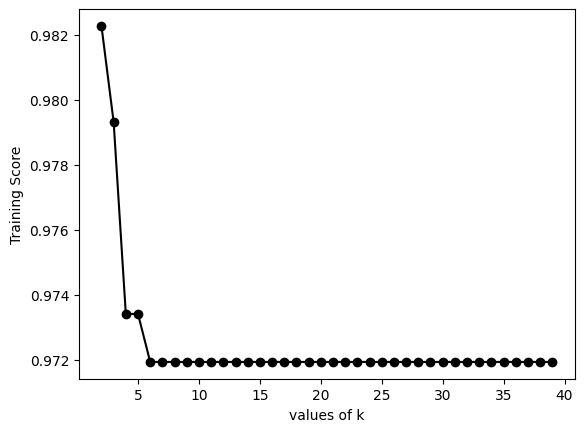

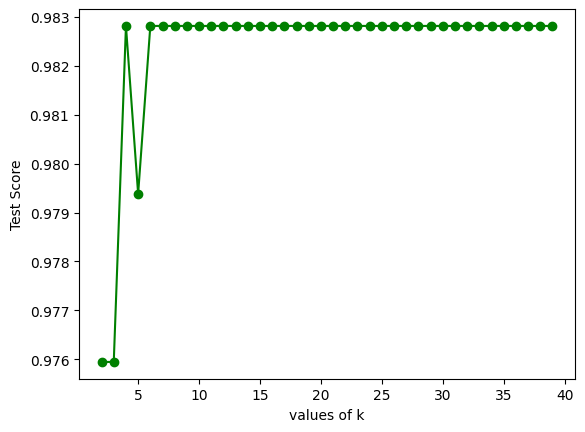

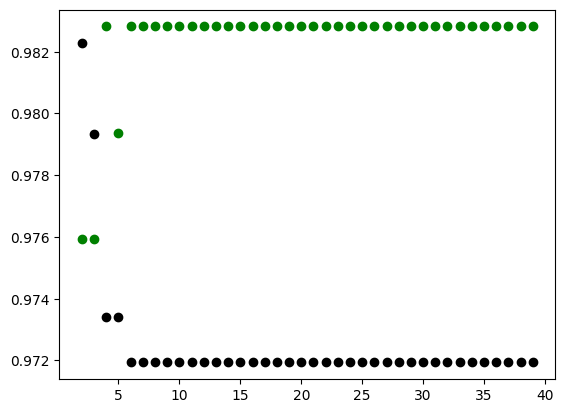

In [412]:
# train score.
plt.plot(K, training, marker='o', color='k')
plt.xlabel('values of k')
plt.ylabel('Training Score')
plt.show()

# Test score.

plt.plot(K, test, marker='o', color='g')
plt.xlabel('values of k')
plt.ylabel('Test Score')
plt.show()

# Train score Vs. test score

plt.scatter(K, training, color='k')
plt.scatter(K, test, color='g')
plt.show()

# K-means Algorithm

# Importing dependencies

In [413]:
import json
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [414]:
# add the link of your dataset here:https://www.kaggle.com/datasets/johoetter/is-this-sentence-completed

df=pd.read_json('finished_sentences.json')
df.head()

,sentence,is_finished
0,"Apple supplier AMS cuts forecast, indicating p...",Finished
1,U.S. factory and services activity quicken in ...,Finished
2,Exclusive: Tesla expects global shortage of el...,Unfinished
3,"World stocks climb on China trade relief, whil...",Finished
4,"Boeing, J&J, dismal China data drag Wall Stree...",Finished


In [415]:
df.shape

(53149, 2)

In [416]:

# Extract the sentence only
df=df.iloc[:20000]
#because (Unable to allocate 9.25 GiB for an array with shape (53149, 23355) and data type float64) ^_^
sen = df.sentence

print(sen)

0        Apple supplier AMS cuts forecast, indicating p...
1        U.S. factory and services activity quicken in ...
2        Exclusive: Tesla expects global shortage of el...
3        World stocks climb on China trade relief, whil...
4        Boeing, J&J, dismal China data drag Wall Stree...
                               ...                        
19995    U.S. dollar rises on weaker euro, Fed policy; ...
19996    Lennar sees improvement in buyer traffic in fi...
19997    U.S. import prices rebound; underlying trend r...
19998    German auto lobby to pick utility manager Hild...
19999    Ford Canada CEO says firm has no plans for GM-...
Name: sentence, Length: 20000, dtype: object


In [417]:

# create vectorizer
vectorizer = TfidfVectorizer(stop_words='english')


# vectorizer the text documents
vectorized_documents = vectorizer.fit_transform(sen)

In [418]:
# reduce the dimensionality of the data using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(vectorized_documents.toarray())

In [419]:
# cluster the documents using k-means
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, n_init=5,
				max_iter=500, random_state=42)
kmeans.fit(vectorized_documents)

KMeans(max_iter=500, n_clusters=2, n_init=5, random_state=42)

In [420]:

# create a dataframe to store the results
results = pd.DataFrame()

results['document'] = sen
results['cluster'] = kmeans.labels_

results.head()

,document,cluster
0,"Apple supplier AMS cuts forecast, indicating p...",0
1,U.S. factory and services activity quicken in ...,0
2,Exclusive: Tesla expects global shortage of el...,0
3,"World stocks climb on China trade relief, whil...",1
4,"Boeing, J&J, dismal China data drag Wall Stree...",1


In [421]:
# print random 25 samples
print(results.sample(25))

                                                document  cluster
15233           UK's Debenhams can grow again, says boss        0
9606   Cambridge Analytica played key Trump campaign ...        0
13826  Factbox: What is actually in the U.S.-China 'P...        1
12287  Civil rights groups warn Amazon about govt use...        0
9371      Trump says 'big deal looking good with Mexico'        0
6494   Trump hopes for deal in U.S. Congress on small...        0
15492       Fidelity Investments winds down $3.5 billion        0
7169   Uber, Postmates agree on $2.65 billion all-sto...        0
1298   U.S. 'very, very optimistic' about reaching a ...        1
19644  Kuwaiti parliament to investigate Airbus aircr...        0
14715  Czech cyber watchdog calls Huawei, ZTE product...        0
13517  Airbus plant in Alabama spared fallout from U....        0
850    Noble Group to name former Morgan Stanley bank...        0
6589   Everything Jim Cramer said on 'Mad Money,' inc...        0
17543     

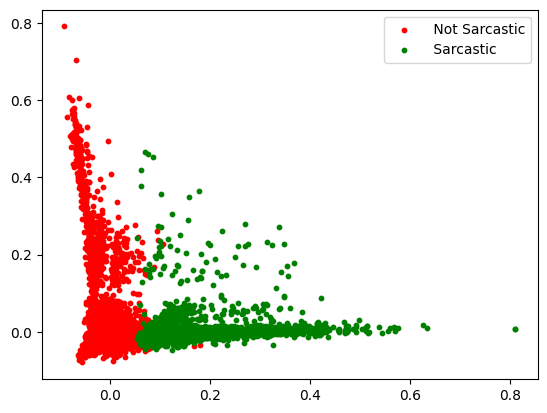

In [422]:
# plot the results
colors = ['red', 'green']
cluster = ['Not Sarcastic','Sarcastic']
for i in range(num_clusters):
	plt.scatter(reduced_data[kmeans.labels_ == i, 0],
				reduced_data[kmeans.labels_ == i, 1],
				s=10, color=colors[i],
				label=f' {cluster[i]}')
plt.legend()
plt.show()